In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
testdemo = pd.read_csv('testdemographics.csv')
testperf = pd.read_csv('testperf.csv')
testprev = pd.read_csv('testprevloans.csv')
traindemo = pd.read_csv('traindemographics.csv')
trainperf = pd.read_csv('trainperf.csv')
trainprev = pd.read_csv('trainprevloans.csv')

#### Data Overview

In [3]:
# Check the size of all dataset
traindemo.shape, trainperf.shape, trainprev.shape

((4346, 9), (4368, 10), (18183, 12))

In [4]:
testdemo.shape, testperf.shape, testprev.shape

((1487, 9), (1450, 9), (5907, 12))

In [5]:
perf_demo = trainperf.merge(traindemo, on = 'customerid', how = 'left')

In [6]:
perf_demo.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,"DUGBE,IBADAN",Permanent,Graduate
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,NaN,Permanent,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,NaN,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,NaN,Permanent,Primary


### Merge train and test

In [7]:
data_demo = pd.concat([traindemo, testdemo])
data_perf = pd.concat([trainperf, testperf])
data_prev = pd.concat([trainprev, testprev])

/home/thenameisdrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [8]:
data_perf.shape, data_demo.shape, data_prev.shape

((5818, 10), (5833, 9), (24090, 12))

In [9]:
len(data_perf.customerid.unique()),len(data_demo.customerid.unique()),len(data_prev.customerid.unique())

(5818, 5818, 5801)

### Checking for  customerid not present in previous

In [10]:
perf_list = data_perf.customerid.unique().tolist()
demo_list = data_demo.customerid.unique().tolist()
prev_list = data_prev.customerid.unique().tolist()


# Check if id  is in test and not in train
s = set(prev_list)
diff = [x for x in demo_list if x not in s]

In [11]:
# diff
data_perf.loc[data_perf.customerid.isin(diff)]

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,systemloanid,termdays,totaldue
1,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,8a85886e54beabf90154c0a29ae757c0,Good,15000.0,2,NaN,301965204,30,17250.0
303,2017-07-28 00:12:31.000000,2017-07-27 23:11:19.000000,8a76e7d443e6e97c0143ed0a13cb4f61,Bad,30000.0,4,NaN,301999706,60,39000.0
2221,2017-07-28 17:15:11.000000,2017-07-28 16:15:03.000000,8a858e4357be1daf0157c96f4c915ef0,Good,10000.0,2,NaN,302001005,15,11500.0
2949,2017-07-27 14:38:40.000000,2017-07-27 13:37:26.000000,8a858fda56562f8f01565f928f516cea,Bad,10000.0,2,NaN,301998904,30,13000.0
3262,2017-07-12 10:24:49.000000,2017-07-12 09:23:37.000000,8a5cfa8345d40fb80145dc328532397a,Good,10000.0,6,NaN,301974306,30,11000.0
3389,2017-07-01 19:02:44.000000,2017-07-01 18:01:36.000000,8a858f6f57d2acb50157dca4f81540e2,Good,10000.0,2,NaN,301959311,30,13000.0
3686,2017-07-26 20:46:27.000000,2017-07-26 19:46:20.000000,8a858ecc57b9184b0157c4ffc1b80614,Bad,10000.0,2,NaN,301997744,30,13000.0
3776,2017-07-22 13:13:25.000000,2017-07-22 12:13:10.000000,8a858f9d5668e3f1015679951579076f,Good,10000.0,2,NaN,301990749,15,11500.0
3849,2017-07-24 05:32:11.000000,2017-07-24 04:31:53.000000,8a858e69566ae5b801567ac352d84477,Good,10000.0,2,NaN,301992704,30,13000.0
161,43:27.0,43:13.0,8a858ecd57b919a70157c8398b5d5300,NaN,10000.0,2,NaN,301986633,30,13000.0


### Drop Duplicates

In [12]:
data_demo = data_demo.drop_duplicates(['customerid'], keep='last')

In [13]:
data_perf.shape, data_demo.shape, data_prev.shape

((5818, 10), (5818, 9), (24090, 12))

### Merge Perfomance and Previous

In [14]:
# merge all demo data together
demo_perf = pd.merge(data_perf, data_demo, how='left', on=['customerid'])

In [15]:
demo_perf.shape

(5818, 18)

### Check for Missing values

In [16]:
demo_perf.isnull().sum()

approveddate                     0
creationdate                     0
customerid                       0
good_bad_flag                 1450
loanamount                       0
loannumber                       0
referredby                    5047
systemloanid                     0
termdays                         0
totaldue                         0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           5753
employment_status_clients      865
level_of_education_clients    5023
dtype: int64

### Drop large missing value columns

In [17]:
demo_perf = demo_perf.drop('bank_branch_clients', axis=1)
demo_perf = demo_perf.drop('level_of_education_clients', axis=1)

In [18]:
demo_perf.isnull().sum()

approveddate                    0
creationdate                    0
customerid                      0
good_bad_flag                1450
loanamount                      0
loannumber                      0
referredby                   5047
systemloanid                    0
termdays                        0
totaldue                        0
birthdate                       0
bank_account_type               0
longitude_gps                   0
latitude_gps                    0
bank_name_clients               0
employment_status_clients     865
dtype: int64

### Add new variables

In [19]:
# Add interest, interest_rate, Age
demo_perf['interest'] = demo_perf.totaldue - demo_perf.loanamount
demo_perf['interest_rate'] = (demo_perf.interest * 100)/(demo_perf.loanamount * demo_perf.termdays)
demo_perf['Age'] = 2017 - pd.to_datetime(demo_perf.birthdate).dt.year

In [20]:
demo_perf.columns

Index(['approveddate', 'creationdate', 'customerid', 'good_bad_flag',
       'loanamount', 'loannumber', 'referredby', 'systemloanid', 'termdays',
       'totaldue', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'interest', 'interest_rate', 'Age'],
      dtype='object')

### Fill Missing values for employment_status

In [21]:
demo_perf.head()

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,systemloanid,termdays,totaldue,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,interest,interest_rate,Age
0,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,8a2a81a74ce8c05d014cfb32a0da1049,Good,30000.0,12,NaN,301994762,30,34500.0,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,4500.0,0.500000,45
1,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,8a85886e54beabf90154c0a29ae757c0,Good,15000.0,2,NaN,301965204,30,17250.0,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,Permanent,2250.0,0.500000,32
2,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,8a8588f35438fe12015444567666018e,Good,20000.0,7,NaN,301966580,15,22250.0,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,Permanent,2250.0,0.750000,33
3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,8a85890754145ace015429211b513e16,Good,10000.0,3,NaN,301999343,15,11500.0,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,Permanent,1500.0,1.000000,40
4,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,8a858970548359cc0154883481981866,Good,40000.0,9,NaN,301962360,30,44000.0,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,Permanent,4000.0,0.333333,31


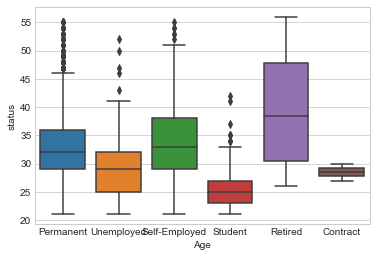

In [22]:
# First look at its relationship with age 
sns.set_style("whitegrid")
sns.boxplot('employment_status_clients', 'Age', data=demo_perf)
plt.xlabel('Age') # Set text for the x axis
plt.ylabel('status')# Set text for y axis
plt.show()

In [23]:
# Replace missing in Student
demo_perf.loc[((demo_perf.Age<28) & (demo_perf.employment_status_clients.isnull())), 'employment_status_clients'] = 'Student'

# Replace missing in Student
demo_perf.loc[((demo_perf.Age<=33) & (demo_perf.employment_status_clients.isnull())), 'employment_status_clients'] = 'Student'


# Replace missing in Student
demo_perf.loc[((demo_perf.Age<=55) & (demo_perf.employment_status_clients.isnull())), 'employment_status_clients'] = 'Student'

# Replace missing in Student
demo_perf.loc[((demo_perf.Age>55) & (demo_perf.employment_status_clients.isnull())), 'employment_status_clients'] = 'Student'


In [24]:
# fill NA refered by with 0
demo_perf.referredby = demo_perf.referredby.fillna(0)

In [25]:
demo_perf.isnull().sum()

approveddate                    0
creationdate                    0
customerid                      0
good_bad_flag                1450
loanamount                      0
loannumber                      0
referredby                      0
systemloanid                    0
termdays                        0
totaldue                        0
birthdate                       0
bank_account_type               0
longitude_gps                   0
latitude_gps                    0
bank_name_clients               0
employment_status_clients       0
interest                        0
interest_rate                   0
Age                             0
dtype: int64

### Now i have filled all missing data. Phew!!!

Look at Previous record

In [26]:
# data_perv.sort_values(by='customerid')

In [27]:
data_perf.loc[data_perf.customerid=='8a33a06e4a5075c2014a5295aa0c2224'].sort_values(by='loannumber')

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,systemloanid,termdays,totaldue
3789,2017-07-18 18:44:17.000000,2017-07-18 17:44:11.000000,8a33a06e4a5075c2014a5295aa0c2224,Bad,20000.0,9,NaN,301984436,30,24500.0


In [28]:
data_prev.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [29]:
demo_perf.columns

Index(['approveddate', 'creationdate', 'customerid', 'good_bad_flag',
       'loanamount', 'loannumber', 'referredby', 'systemloanid', 'termdays',
       'totaldue', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'interest', 'interest_rate', 'Age'],
      dtype='object')

In [30]:
data_perf.columns

Index(['approveddate', 'creationdate', 'customerid', 'good_bad_flag',
       'loanamount', 'loannumber', 'referredby', 'systemloanid', 'termdays',
       'totaldue'],
      dtype='object')

### Fill referredby of Previous data

### Add feature number of loans

In [36]:
demo_perf.isnull().sum()

approveddate                    0
creationdate                    0
customerid                      0
good_bad_flag                1450
loanamount                      0
loannumber                      0
referredby                      0
systemloanid                    0
termdays                        0
totaldue                        0
birthdate                       0
bank_account_type               0
longitude_gps                   0
latitude_gps                    0
bank_name_clients               0
employment_status_clients       0
interest                        0
interest_rate                   0
Age                             0
dtype: int64

Adding new features

In [37]:
data_demo.employment_status_clients.value_counts()

Permanent        4205
Self-Employed     470
Student           189
Unemployed         79
Retired             8
Contract            2
Name: employment_status_clients, dtype: int64

In [38]:
data_perf.head()

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,systemloanid,termdays,totaldue
0,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,8a2a81a74ce8c05d014cfb32a0da1049,Good,30000.0,12,NaN,301994762,30,34500.0
1,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,8a85886e54beabf90154c0a29ae757c0,Good,15000.0,2,NaN,301965204,30,17250.0
2,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,8a8588f35438fe12015444567666018e,Good,20000.0,7,NaN,301966580,15,22250.0
3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,8a85890754145ace015429211b513e16,Good,10000.0,3,NaN,301999343,15,11500.0
4,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,8a858970548359cc0154883481981866,Good,40000.0,9,NaN,301962360,30,44000.0


In [39]:
data_demo.isnull().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           5753
employment_status_clients      865
level_of_education_clients    5023
dtype: int64

In [40]:
# data_demo[['Age','employment_status_clients' ]].Age > 22
bad = data_perf[data_perf.good_bad_flag == 'Bad'].customerid.tolist()

In [43]:
demo_perf

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,systemloanid,termdays,totaldue,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,interest,interest_rate,Age
0,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,8a2a81a74ce8c05d014cfb32a0da1049,Good,30000.0,12,0,301994762,30,34500.0,1972-01-15 00:00:00.000000,Other,3.432010,6.433055,Diamond Bank,Permanent,4500.0,0.500000,45
1,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,8a85886e54beabf90154c0a29ae757c0,Good,15000.0,2,0,301965204,30,17250.0,1985-08-23 00:00:00.000000,Savings,3.885298,7.320700,GT Bank,Permanent,2250.0,0.500000,32
2,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,8a8588f35438fe12015444567666018e,Good,20000.0,7,0,301966580,15,22250.0,1984-09-18 00:00:00.000000,Other,11.139350,10.292041,EcoBank,Permanent,2250.0,0.750000,33
3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,8a85890754145ace015429211b513e16,Good,10000.0,3,0,301999343,15,11500.0,1977-10-10 00:00:00.000000,Savings,3.985770,7.491708,First Bank,Permanent,1500.0,1.000000,40
4,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,8a858970548359cc0154883481981866,Good,40000.0,9,0,301962360,30,44000.0,1986-09-07 00:00:00.000000,Other,7.457913,9.076574,GT Bank,Permanent,4000.0,0.333333,31
5,2017-07-19 21:46:24.000000,2017-07-19 20:46:18.000000,8a8589f35451855401546b0738c42524,Good,30000.0,8,0,301986516,60,39000.0,1972-12-22 00:00:00.000000,Savings,3.311982,6.633271,Access Bank,Permanent,9000.0,0.500000,45
6,2017-07-10 19:25:33.000000,2017-07-10 18:25:28.000000,8a858e095c59b91b015c5e5cea3719bc,Good,10000.0,3,0,301972027,30,13000.0,1989-05-29 00:00:00.000000,Savings,3.259444,6.557011,GT Bank,Permanent,3000.0,1.000000,28
7,2017-07-24 23:42:27.000000,2017-07-24 22:42:21.000000,8a858e1158dc4d830158f7bde4f47ea7,Good,30000.0,10,0,301994428,30,34500.0,1987-09-20 00:00:00.000000,Savings,6.178056,5.425800,First Bank,Student,4500.0,0.500000,30
8,2017-07-26 10:53:05.000000,2017-07-26 09:52:57.000000,8a858e185b4923b4015b4ae48d28646a,Good,10000.0,4,0,301996687,15,11500.0,1987-06-09 00:00:00.000000,Savings,3.396524,6.627943,GT Bank,Permanent,1500.0,1.000000,30
9,2017-07-17 13:48:42.000000,2017-07-17 12:48:35.000000,8a858e1d5cd58f9e015ceda4bdb63673,Good,10000.0,2,0,301981931,15,11500.0,1984-12-10 00:00:00.000000,Savings,3.285872,6.582444,Access Bank,Unemployed,1500.0,1.000000,33


In [45]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(data_demo[['longitude_gps', 'latitude_gps']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
labels = model.predict(data_demo[['longitude_gps', 'latitude_gps']])

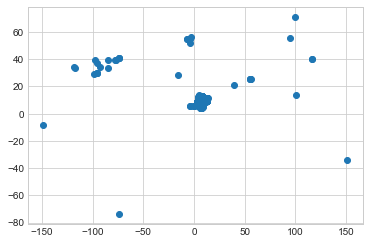

In [47]:
import matplotlib.pyplot as plt 
plt.scatter(data_demo[['longitude_gps']], data_demo[['latitude_gps']]) 
plt.show()

In [48]:
X = demo_perf

In [ ]:
demo_perf.columns

In [ ]:
data_perv.columns

In [ ]:
data_perv.pop('totaldue')
data_perv.pop('termdays')

In [ ]:
X.columns

In [ ]:
X_train = data_perv.merge(X, on = 'customerid', how = 'left')

In [ ]:
X_train.head()

In [ ]:
X_train.pop('birthdate')
X_train.pop('approveddate')
X_train.pop('creationdate')
X_train.pop('birthdate')
X_train.pop('good_bad_flag')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [ ]:
y.unique()

In [ ]:
data_perf.columns

In [ ]:
y = train_perf['good_bad_flag']

In [ ]:
y

In [ ]:
demo_perf = demo_perf.drop(['approveddate','creationdate','referredby','birthdate','longitude_gps','latitude_gps'], axis=1)

In [ ]:
demo_perf = demo_perf.drop('customerid', axis=1)

In [ ]:
demo_perf.drop('systemloanid', axis=1)

In [ ]:
demo_perf.columns

In [ ]:
demo_perf.pop('systemloanid')

In [ ]:
demo_perf.columns

In [ ]:
train_y = demo_perf.good_bad_flag[:4368]

In [ ]:
demo_perf = demo_perf.drop('good_bad_flag', axis=1)

In [ ]:
demo_perf = pd.get_dummies(demo_perf)

In [ ]:
train = demo_perf[:4368]
test = demo_perf[4368:]

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [ ]:
xgb.fit(train, train_y)

In [ ]:
y = xgb.predict(test)

In [ ]:
y

In [ ]:
testperf

In [ ]:
sub = pd.DataFrame({'customerID':testperf.customerid, 'Good_Bad_flag':y})

In [ ]:
sub.Good_Bad_flag = sub.Good_Bad_flag.map({'Good':1, 'Bad':0})

In [ ]:
sub.to_csv('my_first.csv', index=False)